# <u> Analysis of the Top 50 ATP Tennis Players </u>

In this workbook, I will be analyzing the statistics webscraped from tennisabstract.com in order to compare the metrics of professional play with tennis methodology I have learned throughout my own tennis journey (Playing and Coaching). 

DATA SCRAPPED ON SEPTEMBER 2022

## <u> Set-up </u>

First store the neccessary information and perform data quality checks

In [19]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
from scipy import stats

We will now load data from our webscraped csv file into multiple dataframes

In [20]:
serve_data = pd.read_csv('data\serve.csv')
return_data = pd.read_csv('data/return.csv')
breaks_data = pd.read_csv('data/breaks.csv')
more_data = pd.read_csv('data/more.csv')

Now print the first dataframe and perform data checks

In [21]:
serve_data.head(5)


,Rk,Player,M,M W-L,M W%,SPW,SPW-InP,Aces,Ace%,DFs,DF%,DF/2s,1stIn,1st%,2nd%,2%-InP,Hld%,Pts/SG,PtsL/SG
0,1,Daniil Medvedev [RUS],65,50-15,76.9%,67.7%,67.5%,507,11.4%,230,5.2%,14.1%,63.4%,76.7%,52.3%,60.9%,86.4%,6.2,2.0
1,2,Alexander Zverev [GER],57,44-13,77.2%,68.6%,67.6%,416,12.1%,149,4.3%,14.8%,70.7%,76.3%,49.9%,58.5%,86.8%,6.0,1.9
2,3,Rafael Nadal [ESP],39,35-4,89.7%,66.7%,67.8%,159,5.6%,120,4.3%,12.3%,65.5%,72.9%,55.1%,62.8%,84.5%,6.2,2.1
3,4,Carlos Alcaraz [ESP],66,54-12,81.8%,66.7%,67.2%,237,5.1%,151,3.2%,9.2%,64.7%,72.4%,56.1%,61.8%,84.8%,6.3,2.1
4,5,Stefanos Tsitsipas [GRE],70,50-20,71.4%,67.7%,66.2%,506,9.9%,144,2.8%,7.3%,61.5%,75.7%,54.8%,59.1%,85.5%,6.2,2.0


In [22]:
serve_data.dtypes

Rk           int64
Player      object
M            int64
M W-L       object
M W%        object
SPW         object
SPW-InP     object
Aces         int64
Ace%        object
DFs          int64
DF%         object
DF/2s       object
1stIn       object
1st%        object
2nd%        object
2%-InP      object
Hld%        object
Pts/SG     float64
PtsL/SG    float64
dtype: object

We see above that many of the columns that contain numbers are listed as objects. We need to convert these objects into appropriate float values, and then changing the values from percent to decimal. Now, I will create a generic function to convert these values from percentage to decimal so that this can be reused for the other dataframes.

In [23]:
def convert(data, column_names):
    for col in data:
        if col in column_names:
            data[col] = data[col].astype(str).str.rstrip('%').astype(float)/100.0

convert(serve_data, ('M W%', 'SPW',	'SPW-InP', 'Ace%', 'DF%', 'DF/2s', '1stIn',	'1st%', '2nd%', '2%-InP', 'Hld%'))
serve_data.dtypes

Rk           int64
Player      object
M            int64
M W-L       object
M W%       float64
SPW        float64
SPW-InP    float64
Aces         int64
Ace%       float64
DFs          int64
DF%        float64
DF/2s      float64
1stIn      float64
1st%       float64
2nd%       float64
2%-InP     float64
Hld%       float64
Pts/SG     float64
PtsL/SG    float64
dtype: object

We now check to see if the values are now correct

In [24]:
serve_data.head(5)

,Rk,Player,M,M W-L,M W%,SPW,SPW-InP,Aces,Ace%,DFs,DF%,DF/2s,1stIn,1st%,2nd%,2%-InP,Hld%,Pts/SG,PtsL/SG
0,1,Daniil Medvedev [RUS],65,50-15,0.769,0.677,0.675,507,0.114,230,0.052,0.141,0.634,0.767,0.523,0.609,0.864,6.2,2.0
1,2,Alexander Zverev [GER],57,44-13,0.772,0.686,0.676,416,0.121,149,0.043,0.148,0.707,0.763,0.499,0.585,0.868,6.0,1.9
2,3,Rafael Nadal [ESP],39,35-4,0.897,0.667,0.678,159,0.056,120,0.043,0.123,0.655,0.729,0.551,0.628,0.845,6.2,2.1
3,4,Carlos Alcaraz [ESP],66,54-12,0.818,0.667,0.672,237,0.051,151,0.032,0.092,0.647,0.724,0.561,0.618,0.848,6.3,2.1
4,5,Stefanos Tsitsipas [GRE],70,50-20,0.714,0.677,0.662,506,0.099,144,0.028,0.073,0.615,0.757,0.548,0.591,0.855,6.2,2.0


Continue this process for the other dataframes (Skip to **Introduction** for first analysis)

In [25]:
return_data.head(5)

,Rk,Player,M,RPW,RPW-InP,vAce%,vDF%,v1st%,v2nd%,Brk%,Pts/RG,PtsW/RG,MdOppRk,MnOppRk
0,1,Daniil Medvedev [RUS],65,39.2%,39.2%,5.0%,3.3%,31.8%,53.1%,26.1%,6.5,2.5,37.0,48.9
1,2,Alexander Zverev [GER],57,37.6%,38.4%,5.4%,2.2%,29.9%,50.7%,24.5%,6.3,2.4,34.5,48.0
2,3,Rafael Nadal [ESP],39,40.8%,42.2%,7.6%,3.2%,33.7%,53.3%,29.4%,6.6,2.7,32.0,50.6
3,4,Carlos Alcaraz [ESP],66,41.2%,40.9%,4.1%,3.3%,33.7%,53.5%,29.5%,6.8,2.8,36.5,54.9
4,5,Stefanos Tsitsipas [GRE],70,36.2%,35.8%,5.7%,3.9%,28.5%,49.6%,21.9%,6.3,2.3,45.0,56.7


In [26]:
breaks_data.head(5)

,Rk,Player,M,BPConv%,BPConv,BPChnc,BP/G,BP/S,BP/M,Bks/S,Bks/M,BPSvd%,BPSaved,BPvs,BPvs/G,BPvs/S,BPvs/M,Bkn/S,Bkn/M
0,1,Daniil Medvedev [RUS],65,43.4%,184,424,0.60,2.7,6.5,1.15,2.8,66.3%,193,291,0.40,1.8,4.5,0.61,1.5
1,2,Alexander Zverev [GER],57,42.9%,141,329,0.57,2.3,5.8,1.00,2.5,63.6%,133,209,0.36,1.5,3.7,0.54,1.3
2,3,Rafael Nadal [ESP],39,42.0%,129,307,0.70,2.7,7.9,1.12,3.3,64.3%,126,196,0.43,1.7,5.0,0.61,1.8
3,4,Carlos Alcaraz [ESP],66,40.2%,221,550,0.74,3.1,8.3,1.24,3.3,67.2%,232,345,0.46,1.9,5.2,0.63,1.7
4,5,Stefanos Tsitsipas [GRE],70,43.1%,176,408,0.51,2.2,5.8,0.95,2.5,66.4%,237,357,0.43,1.9,5.1,0.65,1.7


In [27]:
more_data.head(5)

,Rk,Player,M,DR,Points,TPW%,TBs,TB W-L,TB W%,TB/S,Sets,Set W-L,S W%,Gms,Game W-L,G W%,Time/Mt,Min/Set,Sec/Pt
0,1,Daniil Medvedev [RUS],65,1.22,9044,53.3%,29,19-10,65.5%,18.1%,160,117-43,73.1%,1425,805-620,56.5%,1:41,40.9,43.4
1,2,Alexander Zverev [GER],57,1.20,7095,52.7%,24,18-6,75.0%,17.0%,141,102-39,72.3%,1153,642-511,55.7%,1:34,38.1,45.5
2,3,Rafael Nadal [ESP],39,1.23,5730,53.6%,16,13-3,81.3%,13.9%,115,90-25,78.3%,892,512-380,57.4%,2:03,41.9,50.4
3,4,Carlos Alcaraz [ESP],66,1.24,9715,53.4%,40,27-13,67.5%,22.5%,178,133-45,74.7%,1491,851-640,57.1%,1:54,42.1,46.3
4,5,Stefanos Tsitsipas [GRE],70,1.12,10198,52.0%,34,21-13,61.8%,18.4%,185,119-66,64.3%,1631,882-749,54.1%,1:47,40.5,44.1


In [28]:
convert(return_data, ('RPW', 'RPW-InP', 'vAce%', 'vDF%', 'v1st%', 'v2nd%', 'Brk%'))
convert(breaks_data, ('BPConv%', 'BPSvd%'))
convert(more_data, ('TPW%', 'TB W%', 'S W%', 'G W%'))

In [29]:
return_data.head(5)

,Rk,Player,M,RPW,RPW-InP,vAce%,vDF%,v1st%,v2nd%,Brk%,Pts/RG,PtsW/RG,MdOppRk,MnOppRk
0,1,Daniil Medvedev [RUS],65,0.392,0.392,0.050,0.033,0.318,0.531,0.261,6.5,2.5,37.0,48.9
1,2,Alexander Zverev [GER],57,0.376,0.384,0.054,0.022,0.299,0.507,0.245,6.3,2.4,34.5,48.0
2,3,Rafael Nadal [ESP],39,0.408,0.422,0.076,0.032,0.337,0.533,0.294,6.6,2.7,32.0,50.6
3,4,Carlos Alcaraz [ESP],66,0.412,0.409,0.041,0.033,0.337,0.535,0.295,6.8,2.8,36.5,54.9
4,5,Stefanos Tsitsipas [GRE],70,0.362,0.358,0.057,0.039,0.285,0.496,0.219,6.3,2.3,45.0,56.7


In [30]:
breaks_data.head(5)

,Rk,Player,M,BPConv%,BPConv,BPChnc,BP/G,BP/S,BP/M,Bks/S,Bks/M,BPSvd%,BPSaved,BPvs,BPvs/G,BPvs/S,BPvs/M,Bkn/S,Bkn/M
0,1,Daniil Medvedev [RUS],65,0.434,184,424,0.60,2.7,6.5,1.15,2.8,0.663,193,291,0.40,1.8,4.5,0.61,1.5
1,2,Alexander Zverev [GER],57,0.429,141,329,0.57,2.3,5.8,1.00,2.5,0.636,133,209,0.36,1.5,3.7,0.54,1.3
2,3,Rafael Nadal [ESP],39,0.420,129,307,0.70,2.7,7.9,1.12,3.3,0.643,126,196,0.43,1.7,5.0,0.61,1.8
3,4,Carlos Alcaraz [ESP],66,0.402,221,550,0.74,3.1,8.3,1.24,3.3,0.672,232,345,0.46,1.9,5.2,0.63,1.7
4,5,Stefanos Tsitsipas [GRE],70,0.431,176,408,0.51,2.2,5.8,0.95,2.5,0.664,237,357,0.43,1.9,5.1,0.65,1.7


In [31]:
more_data.head(5)

,Rk,Player,M,DR,Points,TPW%,TBs,TB W-L,TB W%,TB/S,Sets,Set W-L,S W%,Gms,Game W-L,G W%,Time/Mt,Min/Set,Sec/Pt
0,1,Daniil Medvedev [RUS],65,1.22,9044,0.533,29,19-10,0.655,18.1%,160,117-43,0.731,1425,805-620,0.565,1:41,40.9,43.4
1,2,Alexander Zverev [GER],57,1.20,7095,0.527,24,18-6,0.750,17.0%,141,102-39,0.723,1153,642-511,0.557,1:34,38.1,45.5
2,3,Rafael Nadal [ESP],39,1.23,5730,0.536,16,13-3,0.813,13.9%,115,90-25,0.783,892,512-380,0.574,2:03,41.9,50.4
3,4,Carlos Alcaraz [ESP],66,1.24,9715,0.534,40,27-13,0.675,22.5%,178,133-45,0.747,1491,851-640,0.571,1:54,42.1,46.3
4,5,Stefanos Tsitsipas [GRE],70,1.12,10198,0.520,34,21-13,0.618,18.4%,185,119-66,0.643,1631,882-749,0.541,1:47,40.5,44.1


# <u> Introduction </u>

Using data web scraped from tennisabstract.com, we will look at what attributes and trends define top rated professional tennis players. Referring to common tennis strategies and teaching methods that I have encountered, we will also compare how well theory that is often taught to beginner players holds up in a professional setting.

The four datasets collected will not help us analyze the entire game, especially when it comes to specific strokes (forehand, volleys, dropshots, etc). Instead, we will look more at higher level decisions that players can make to pull the game in their favor.

# <u> Serves </u>
 
First, let's look at the serve. The serve is what starts each point and therefore gives the server an advantage because they get to choose how to start the point. Naturally, we could argue that a strong serve will yield better results. Let's first look at aces (an unreturnable serve) and hold percentage (games won as the server).

In [32]:
top_10 = serve_data[serve_data['Rk'] <= 10]
djokovic = serve_data[serve_data.Player == 'Novak Djokovic [SRB]']
isner = serve_data[serve_data.Player == 'John Isner [USA]']


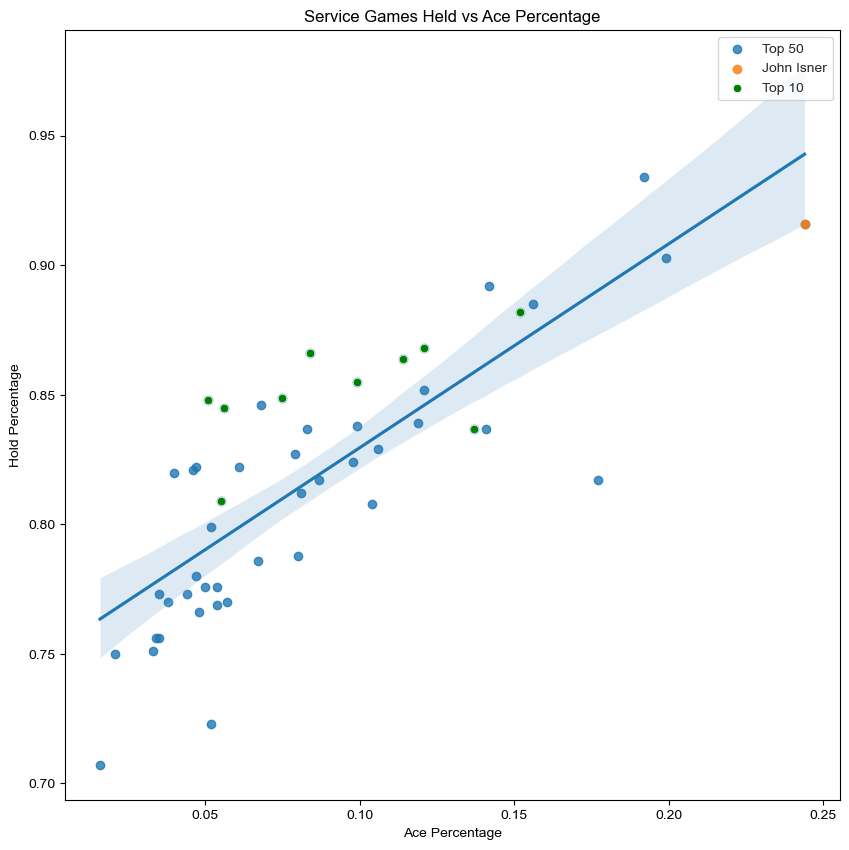

In [33]:
plt.figure(figsize=(10,10))
sns.regplot(data=serve_data, x='Ace%', y='Hld%', label='Top 50')
sns.regplot(data=isner,x='Ace%', y='Hld%', label='John Isner')
sns.scatterplot(data=top_10, x='Ace%', y='Hld%', label="Top 10", color='green')
plt.xlabel('Ace Percentage')
plt.ylabel('Hold Percentage')
plt.title('Service Games Held vs Ace Percentage')
sns.set_style('whitegrid')
plt.legend()

In [34]:
r_squared = stats.pearsonr(serve_data['Ace%'], serve_data['Hld%'])[0]**2
r_squared

0.6469361866845189

Here, I used a linear regression which reveals there is indeed a positive relationship between hold percentange and ace percentage. This makes sense because aces will give you points and in turn lead to more games won. I also added an orange dot for John Isner, an american tennis player known for his serve. His height of 6'10'' along with his incredible serve speeds lead him to have among the highest ace and hold percentages. His all-time highest ranking was 8. We can see his ace percentage is the highest. Isner hits aces one in every four serves(!) and maintains about a 90% hold percentage. 

However, looking at the top 10 players on the tour, we see their ace percentage varies. Yet, their hold percentage are among the highest in the cluster in the bottom left corner of the graph. John Isner (at the time of scraping the data, he is retired now) was ranked 48. Despite his high hold and ace percentage, he is not winning as much as others.

Let us look at the win percentages of the top 50 players and compare that with their ace and hold percentage

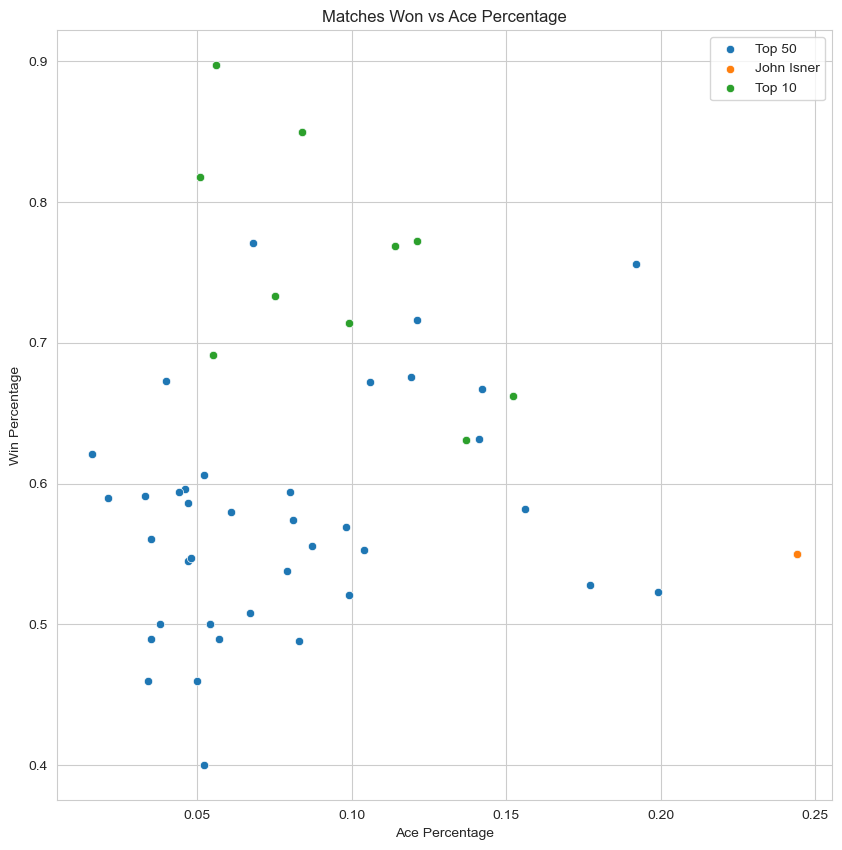

In [35]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=serve_data, x='Ace%', y='M W%', label='Top 50', ci=None)
sns.scatterplot(data=isner,x='Ace%', y='M W%', label='John Isner')
sns.scatterplot(data=top_10,x='Ace%', y='M W%', label='Top 10', ci=None)
plt.xlabel('Ace Percentage')
plt.ylabel('Win Percentage')
plt.title('Matches Won vs Ace Percentage')
sns.set_style('whitegrid')
plt.legend()



In [36]:
r_squared = stats.pearsonr(serve_data['Ace%'], serve_data['M W%'])[0]**2
r_squared

0.025478082005359184

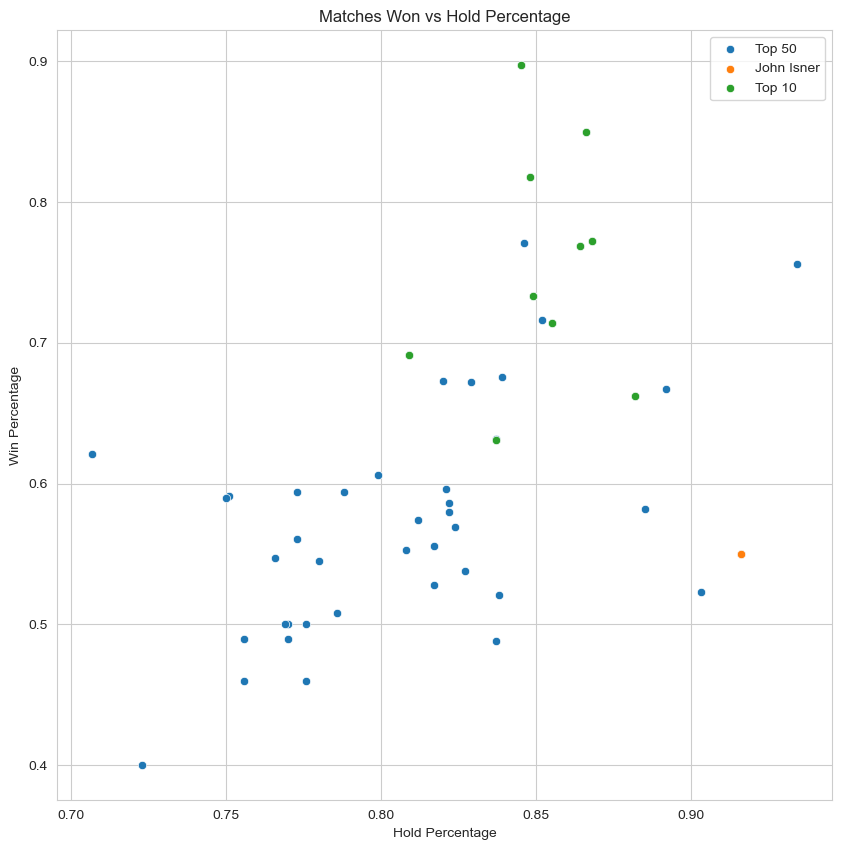

In [39]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=serve_data, x='Hld%', y='M W%', label='Top 50', ci=None)
sns.scatterplot(data=isner,x='Hld%', y='M W%', label='John Isner')
sns.scatterplot(data=top_10,x='Hld%', y='M W%', label='Top 10', ci=None)
plt.xlabel('Hold Percentage')
plt.ylabel('Win Percentage')
plt.title('Matches Won vs Hold Percentage')
sns.set_style('whitegrid')
plt.legend()

In [40]:
r_squared = stats.pearsonr(serve_data['Hld%'], serve_data['M W%'])[0]**2
r_squared

0.29302099042513186

We see Isner holds the highest ace percentage in the top 50 but does not have the highest win percentage. The highest win percentage is held by those in the top 10, yet their ace percentage is below 15%, along with the majority of top 50 players.

High aces do not mean more wins, but rather more games held. This makes sense with what we see in player results at tournaments. Players with strong serves tend to hold frequently, but do not have any strong backup plans if their opponent manages to return their serves. Aces are useful, but will not guarentee wins. There are other factors more influential in winning matches, which we will attempt to analyze.

# <u> Returns </u>